In [6]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import scipy
import os
import numpy as np
project_seed=2023

In [ ]:
len(data)

In [34]:
path1 = "Network class/cls1.mat"
path2 = "Network class/cls2.mat"
path3 = "Network class/cls3.mat"
scaler = StandardScaler()
data1 = scaler.fit_transform(scipy.io.loadmat(path1)["cls1"])
data2 =scaler.fit_transform( scipy.io.loadmat(path2)["cls2"])
data3 = scaler.fit_transform(scipy.io.loadmat(path3)["cls3"])
data4= scaler.fit_transform([np.random.normal(0, 1, size=61) for i in range(len(data1))])
data = np.concatenate((data1, data2, data3,data4), axis=0)
y = np.zeros((data.shape[0],4))
y[0:data1.shape[0],0] = 1
y[data1.shape[0]:data1.shape[0]+data2.shape[0],1] = 1
y[data1.shape[0]+data2.shape[0]:data1.shape[0]+data2.shape[0]+data3.shape[0],2] = 1
y[data1.shape[0]+data2.shape[0]+data3.shape[0]:,3] = 1


In [35]:
X_regression=np.array(data)
y_regression=np.array(np.argmax(y, axis=1))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.6, random_state=project_seed)

### Logistic regression for classification

In [37]:
## Doing Logistic Regression
model = LogisticRegression(multi_class='multinomial', max_iter=10000,)
model.fit(X_train, y_train)

# Step : Prediction
predictions = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(f"Recall: {recall_score(y_test, predictions, average='macro'):.2f}")
print(f"Precision: {precision_score(y_test, predictions, average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test, predictions, average='macro'):.2f}")



Accuracy: 0.46
Recall: 0.26
Precision: 0.32
F1 Score: 0.23


### LSTM

In [38]:
# Transfoming data to be LSTM compatible
win_size=10
X=np.zeros((data.shape[0], data.shape[1]-win_size, win_size))
Y=[]
for j in range(data.shape[0]):
    for i in range(data.shape[1]-win_size):
        X[j, i, :] = data[j, i:i+win_size]
        Y.append(y[j])
Y=np.array(Y)
X=np.reshape(X, (data.shape[0]*(data.shape[1]-win_size), win_size))
Y=np.reshape(Y, (data.shape[0]*(data.shape[1]-win_size), 4))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=project_seed)

In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential()

model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',  # Use categorical_crossentropy for multiclass classification
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=6, validation_split=0.2, verbose=1)

Epoch 1/5
2601/2601 [==============================] - 26s 10ms/step - loss: 0.7387 - accuracy: 0.6404 - val_loss: 0.5540 - val_accuracy: 0.7434
Epoch 2/5
2601/2601 [==============================] - 25s 10ms/step - loss: 0.5529 - accuracy: 0.7424 - val_loss: 0.5940 - val_accuracy: 0.7224
Epoch 3/5
2601/2601 [==============================] - 24s 9ms/step - loss: 0.5008 - accuracy: 0.7733 - val_loss: 1.5703 - val_accuracy: 0.7119
Epoch 4/5
2601/2601 [==============================] - 25s 10ms/step - loss: 0.6602 - accuracy: 0.7707 - val_loss: 0.4622 - val_accuracy: 0.7906
Epoch 5/5
2601/2601 [==============================] - 27s 10ms/step - loss: 0.4570 - accuracy: 0.7924 - val_loss: 0.4429 - val_accuracy: 0.8001


## Testing the model

In [11]:
# Testing the model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = model.predict(X_test)


915/915 [==============================] - 5s 6ms/step


In [12]:
# Calculating precision and recall scores
print(f"Accuracy: {accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)):.2f}")
print(f"Recall: {recall_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro'):.2f}")
print(f"Precision: {precision_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro'):.2f}")
print(f"F1 Score: {f1_score(y_test.argmax(axis=1), y_pred.argmax(axis=1), average='macro'):.2f}")


Accuracy: 0.79
Recall: 0.84
Precision: 0.86


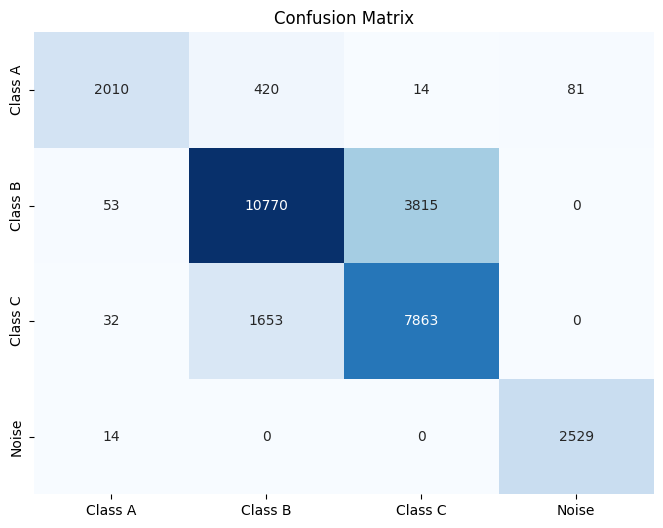

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Noise'],
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Noise'])

# Add title
plt.title('Confusion Matrix')

# Show the plot
plt.show()



## Network class

In [ ]:
# Importing the data from Network signals
paths=[file for file in os.listdir("Network signals/") if file.endswith(".mat")]
data_network=[]
for path in paths:
    data_network.append(scipy.io.loadmat("Network signals/"+path)["s"])
data_network=np.squeeze(np.array(data_network))

In [ ]:
data_network.shape

(1000, 1478)

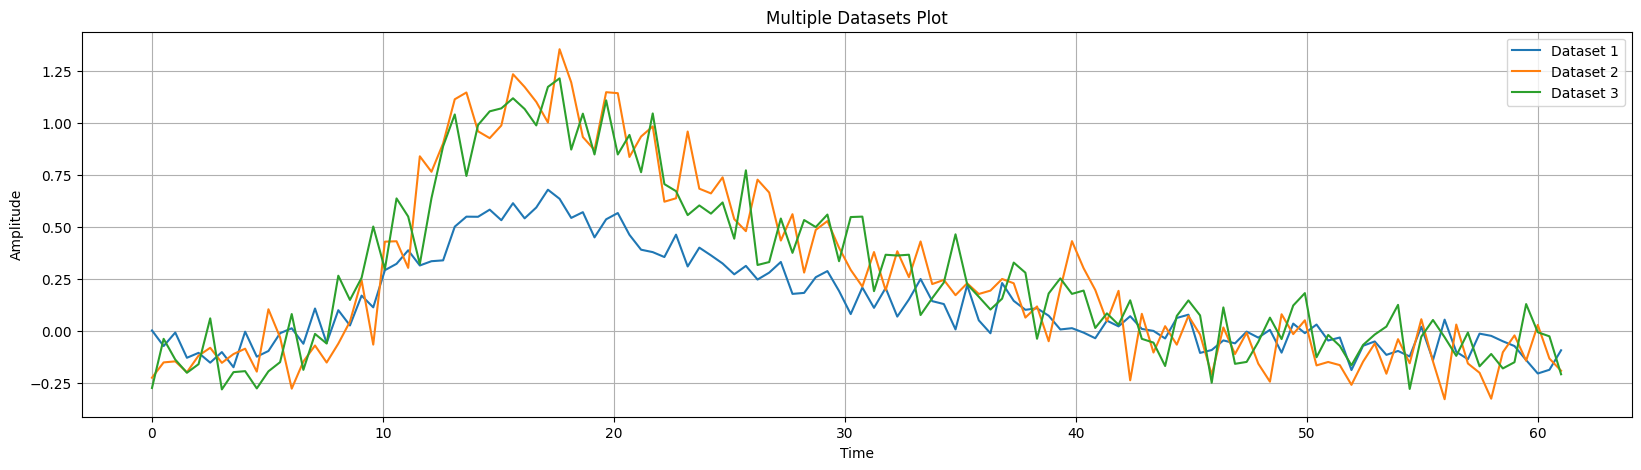

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 5))
time_values = np.linspace(0, 61, len(data_network[0][00:2*61]))

for i, dataset in enumerate(data_network[560:563]):
    plt.plot(time_values, dataset[2*61:4*61], label=f'Dataset {i+1}')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Multiple Datasets Plot')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


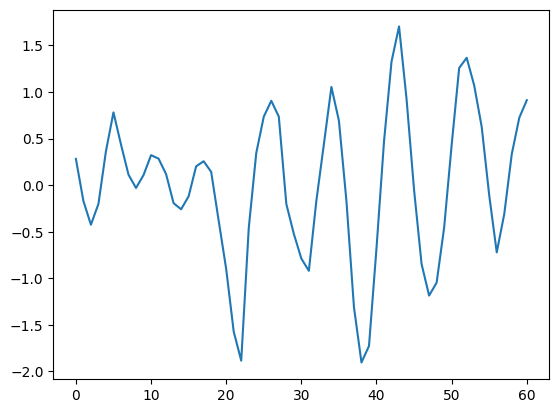

In [ ]:
plt.plot(data1[0])